# Robotator Data Analysis


useful links:

https://matplotlib.org/tutorials/

http://pandas.pydata.org/pandas-docs/stable/

http://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.core.groupby.DataFrameGroupBy.hist.html


Read libraries:

In [2]:

#df_robotator = pd.read_csv('BFI.csv', sep=',')
#df_tablet = pd.read_csv('tablet.csv', sep=',')
#df_summary = pd.DataFrame ()

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cbook as cbook
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

### NARs Summary Analysis:

Sub-scale 1: Negative Attitudes toward Situations and Interactions with Robots. Items - 4,7,8,9,10,12

Sub-scale 2: Negative Attitudes toward Social Influence of Robots. Items - 1,2,11,13,14

Sub-scale 3: Negative Attitudes toward Emotions in Interaction with Robots. Items - 3r,5r,6r

Syrdal, D. S., Dautenhahn, K., Koay, K. L., & Walters, M. L. (2009). The negative attitudes towards robots scale and reactions to robot behaviour in a live human-robot interaction study. Adaptive and Emergent Behaviour and Complex Systems.

r=reversed

In [22]:
def calculate_factors_NARS(data_frame_NARS):
#data_frame_NARS: a data frame of 14 columns 

    NARS_facrots = pd.DataFrame()
    NARS_facrots["NARS_sub1"] = data_frame_NARS[[3,6,7,8,9,11]].mean(axis=1)
    NARS_facrots["NARS_sub2"] = data_frame_NARS[[0,1,10,12,13]].mean(axis=1)
    NARS_facrots["NARS_sub3"] = 6 - data_frame_NARS[[2,4,5]].mean(axis=1)
    
    return NARS_facrots


##Godspeed Summary Analysis
The Godspeed questionnaires defined by Bartneck, Kulic, and Croft (2009)
were used to assess the children’s impressions of the robot, going beyond the
ones already covered in the ALMERE questionnaire. 

Anthropomorphism: Items 1,2,3,4,5

Animacy: Items 6,7,8,9,10,11

Likeability: Items 12,13,14,15,16

Perceived Intelligence: 17,18,19,20,21

Perceived Safety: 22,23,24

Bartneck, C., Kulić, D., Croft, E., & Zoghbi, S. (2009). Measurement instruments for the anthropomorphism, animacy, likeability, perceived intelligence, and perceived safety of robots. International journal of social robotics, 1(1), 71-81.

In [ ]:
def calculate_factors_Godspeed(data_frame_Godspeed):
#data_frame_NARS: a data frame of 24 columns 

    Godspeed_facrots = pd.DataFrame()
    Godspeed_facrots["Godspeed_Anthropomorphism"] = data_frame_Godspeed[[0,1,2,3,4]].mean(axis=1)
    Godspeed_facrots["Godspeed_Animacy"] = data_frame_Godspeed[[5,6,7,8,9,10]].mean(axis=1)
    Godspeed_facrots["Godspeed_Likeability"] =  data_frame_Godspeed[[11,12,13,14,15]].mean(axis=1)
    Godspeed_facrots["Godspeed_Intelligence"] = data_frame_Godspeed[[16,17,18,19,20]].mean(axis=1)
    Godspeed_facrots["Godspeed_Safety"] = data_frame_Godspeed[[21,22,23]].mean(axis=1)
    
    return Godspeed_facrots


##Useful functions

In [52]:
def correlation_matrix(df):
    %matplotlib inline
    corr = df.corr()
    #print(corr)
    plt.figure(figsize=(6,6))
    cax = plt.matshow(corr,fignum=1)
    headers = list(df)
    x_pos = np.arange(len(headers))
    plt.xticks(x_pos, headers, rotation='vertical', fontsize=10)
    y_pos = np.arange(len(headers))
    plt.yticks(y_pos, headers, fontsize=10)
    plt.colorbar(cax)
    plt.show()

In [374]:
def plot_histogram (x, bins=[1,2,3,4,5,6]):
    # x is a series taken from a dataframe
    # n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=1)
    #x = x [~np.isnan(x)] #remove all NaN
    #x1 = np.asarray(x)
    x = x.dropna()
    title = x.name
    n, bins, patches = plt.hist(x.values, bins, facecolor='blue', alpha=1)
    plt.xlabel(title)  #(x.name)
    plt.ylabel('count')
    plt.title(title)#(x.name + " histogram")
    plt.xticks(range(1, 6))
    #plt.axis([40, 160, 0, 0.03])
    plt.grid(True)
    #plt.show()

In [417]:
def plot_multi_histogram(x,xlabel,legend=['tablet', 'robot','teacher'],bins=[1,2,3,4,5,6]):
# x is a list of three series. Their Nan values should be removed
    ta = df_Attitudes_tablet["A_ta_"+str(i+1)].dropna()
    ro = df_Attitudes_robot["A_ro_"+str(i+1)].dropna()
    te = df_Attitudes_teacher["A_te_"+str(i+1)].dropna()
    plt.hist(x,bins=bins, color=['red', 'green','blue'])
    legend = legend
    #plt.xlabel(xlabel)
    plt.title(xlabel)
    plt.ylabel("Frequency")
    plt.legend(legend,loc=2)
    plt.xticks(range(1, 6))

## Read and process robotator data

In [120]:
df_robotator = pd.read_csv('Results_RobotatorHCI_6_2018.csv', sep=',')

NARS_titles = []
for i in range(1,15):
    strNARS_i = 'NARS_'+str(i)
    NARS_titles.append(strNARS_i)
df_NARS = df_robotator[NARS_titles]
NARS_factors = calculate_factors_NARS(df_NARS)

Godspeed_titles = []
for i in range(1,25):
    strGodspeed_i = 'Gdspd_'+str(i)
    Godspeed_titles.append(strGodspeed_i)
df_Godspeed = df_robotator[Godspeed_titles]
Godspeed_factors = calculate_factors_Godspeed(df_Godspeed)

SIMS_titles = []
for i in range(1,17):
    strSIMS_i = 'SIMS_'+str(i)
    SIMS_titles.append(strSIMS_i)
df_SIMS = df_robotator[SIMS_titles]

Attitudes_tablet_titles = []
for i in range(1,16):
    strAttitudes_tablet_i = 'A_ta_'+str(i)
    Attitudes_tablet_titles.append(strAttitudes_tablet_i)
df_Attitudes_tablet = df_robotator[Attitudes_tablet_titles]

Attitudes_robot_titles = []
for i in range(1,16):
    strAttitudes_robot_i = 'A_ro_'+str(i)
    Attitudes_robot_titles.append(strAttitudes_robot_i)
df_Attitudes_robot = df_robotator[Attitudes_robot_titles]

Attitudes_teacher_titles = []
for i in range(1,16):
    strAttitudes_teacher_i = 'A_te_'+str(i)
    Attitudes_teacher_titles.append(strAttitudes_teacher_i)
df_Attitudes_teacher = df_robotator[Attitudes_teacher_titles]


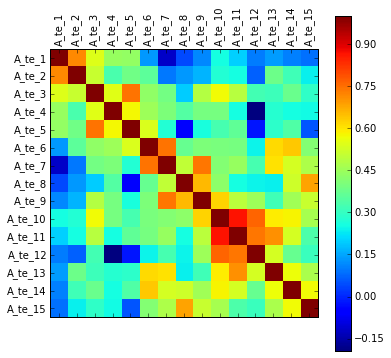

In [121]:
correlation_matrix(df_Attitudes_teacher)

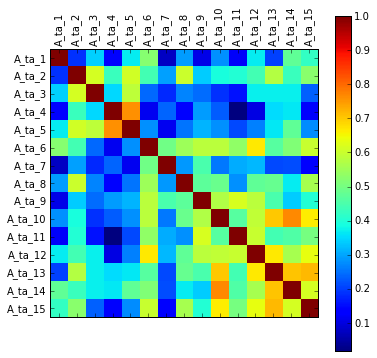

In [122]:
correlation_matrix(df_Attitudes_tablet)

1	הבנתי את ההנחיות

2	ההנחיות היו איכותיות

3	חשתי אמון במרצה/עוזר הוראה

4	חשתי תחושת נוחות עם המראה של האפליקציה

5	חשתי תחושת נוחות עם התנהגות המרצה/עוזר הוראה

6	המרצה/עוזר הוראה תרם לפעילות

7	המרצה/עוזר הוראה סיפק עזרה טכנית

8	ארצה שיעורים נוספים כאלו

9	המרצה/עוזר ההוראה הגיב לקבוצה

10	המרצה/עוזר ההוראה היה ידידותי

11	המרצה/עוזר הוראה התנהג באנושיות

12	המרצה/עוזר הוראה היה אנרגטי במהלך השיעור

13	אהבתי את ההנחייה בפעילות

14	הפעילות היתה נעימה

15	הפעילות היתה מעניינת


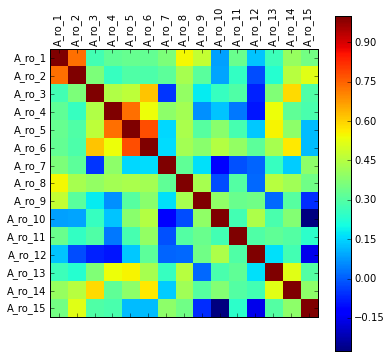

In [234]:
correlation_matrix(df_Attitudes_robot)

In [473]:
ta=df_Attitudes_tablet["A_ta_3"].dropna()
ro=df_Attitudes_robot["A_ro_3"].dropna()
ttest_ind(ta,ro)

(2.0018966339017923, 0.049408736228677523)

In [453]:
data = {'Category': ['cat2','cat1','cat2','cat1','cat2','cat1','cat2','cat1','cat1','cat1','cat2'],
        'values': [1,2,3,1,2,3,1,2,3,5,1]}
my_data = pd.DataFrame(data)
my_data.groupby('Category').mean()
cat1 = my_data[my_data['Category']=='cat1']
cat2 = my_data[my_data['Category']=='cat2']
print("cat1",cat1,type(cat1))
print(type(cat1['values']))
ttest_ind(cat1['values'], cat2['values'])


('cat1',   Category  values
1     cat1       2
3     cat1       1
5     cat1       3
7     cat1       2
8     cat1       3
9     cat1       5, <class 'pandas.core.frame.DataFrame'>)
<class 'pandas.core.series.Series'>


(1.4927289925706944, 0.16970867501294376)

https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c

<function matplotlib.pyplot.show>

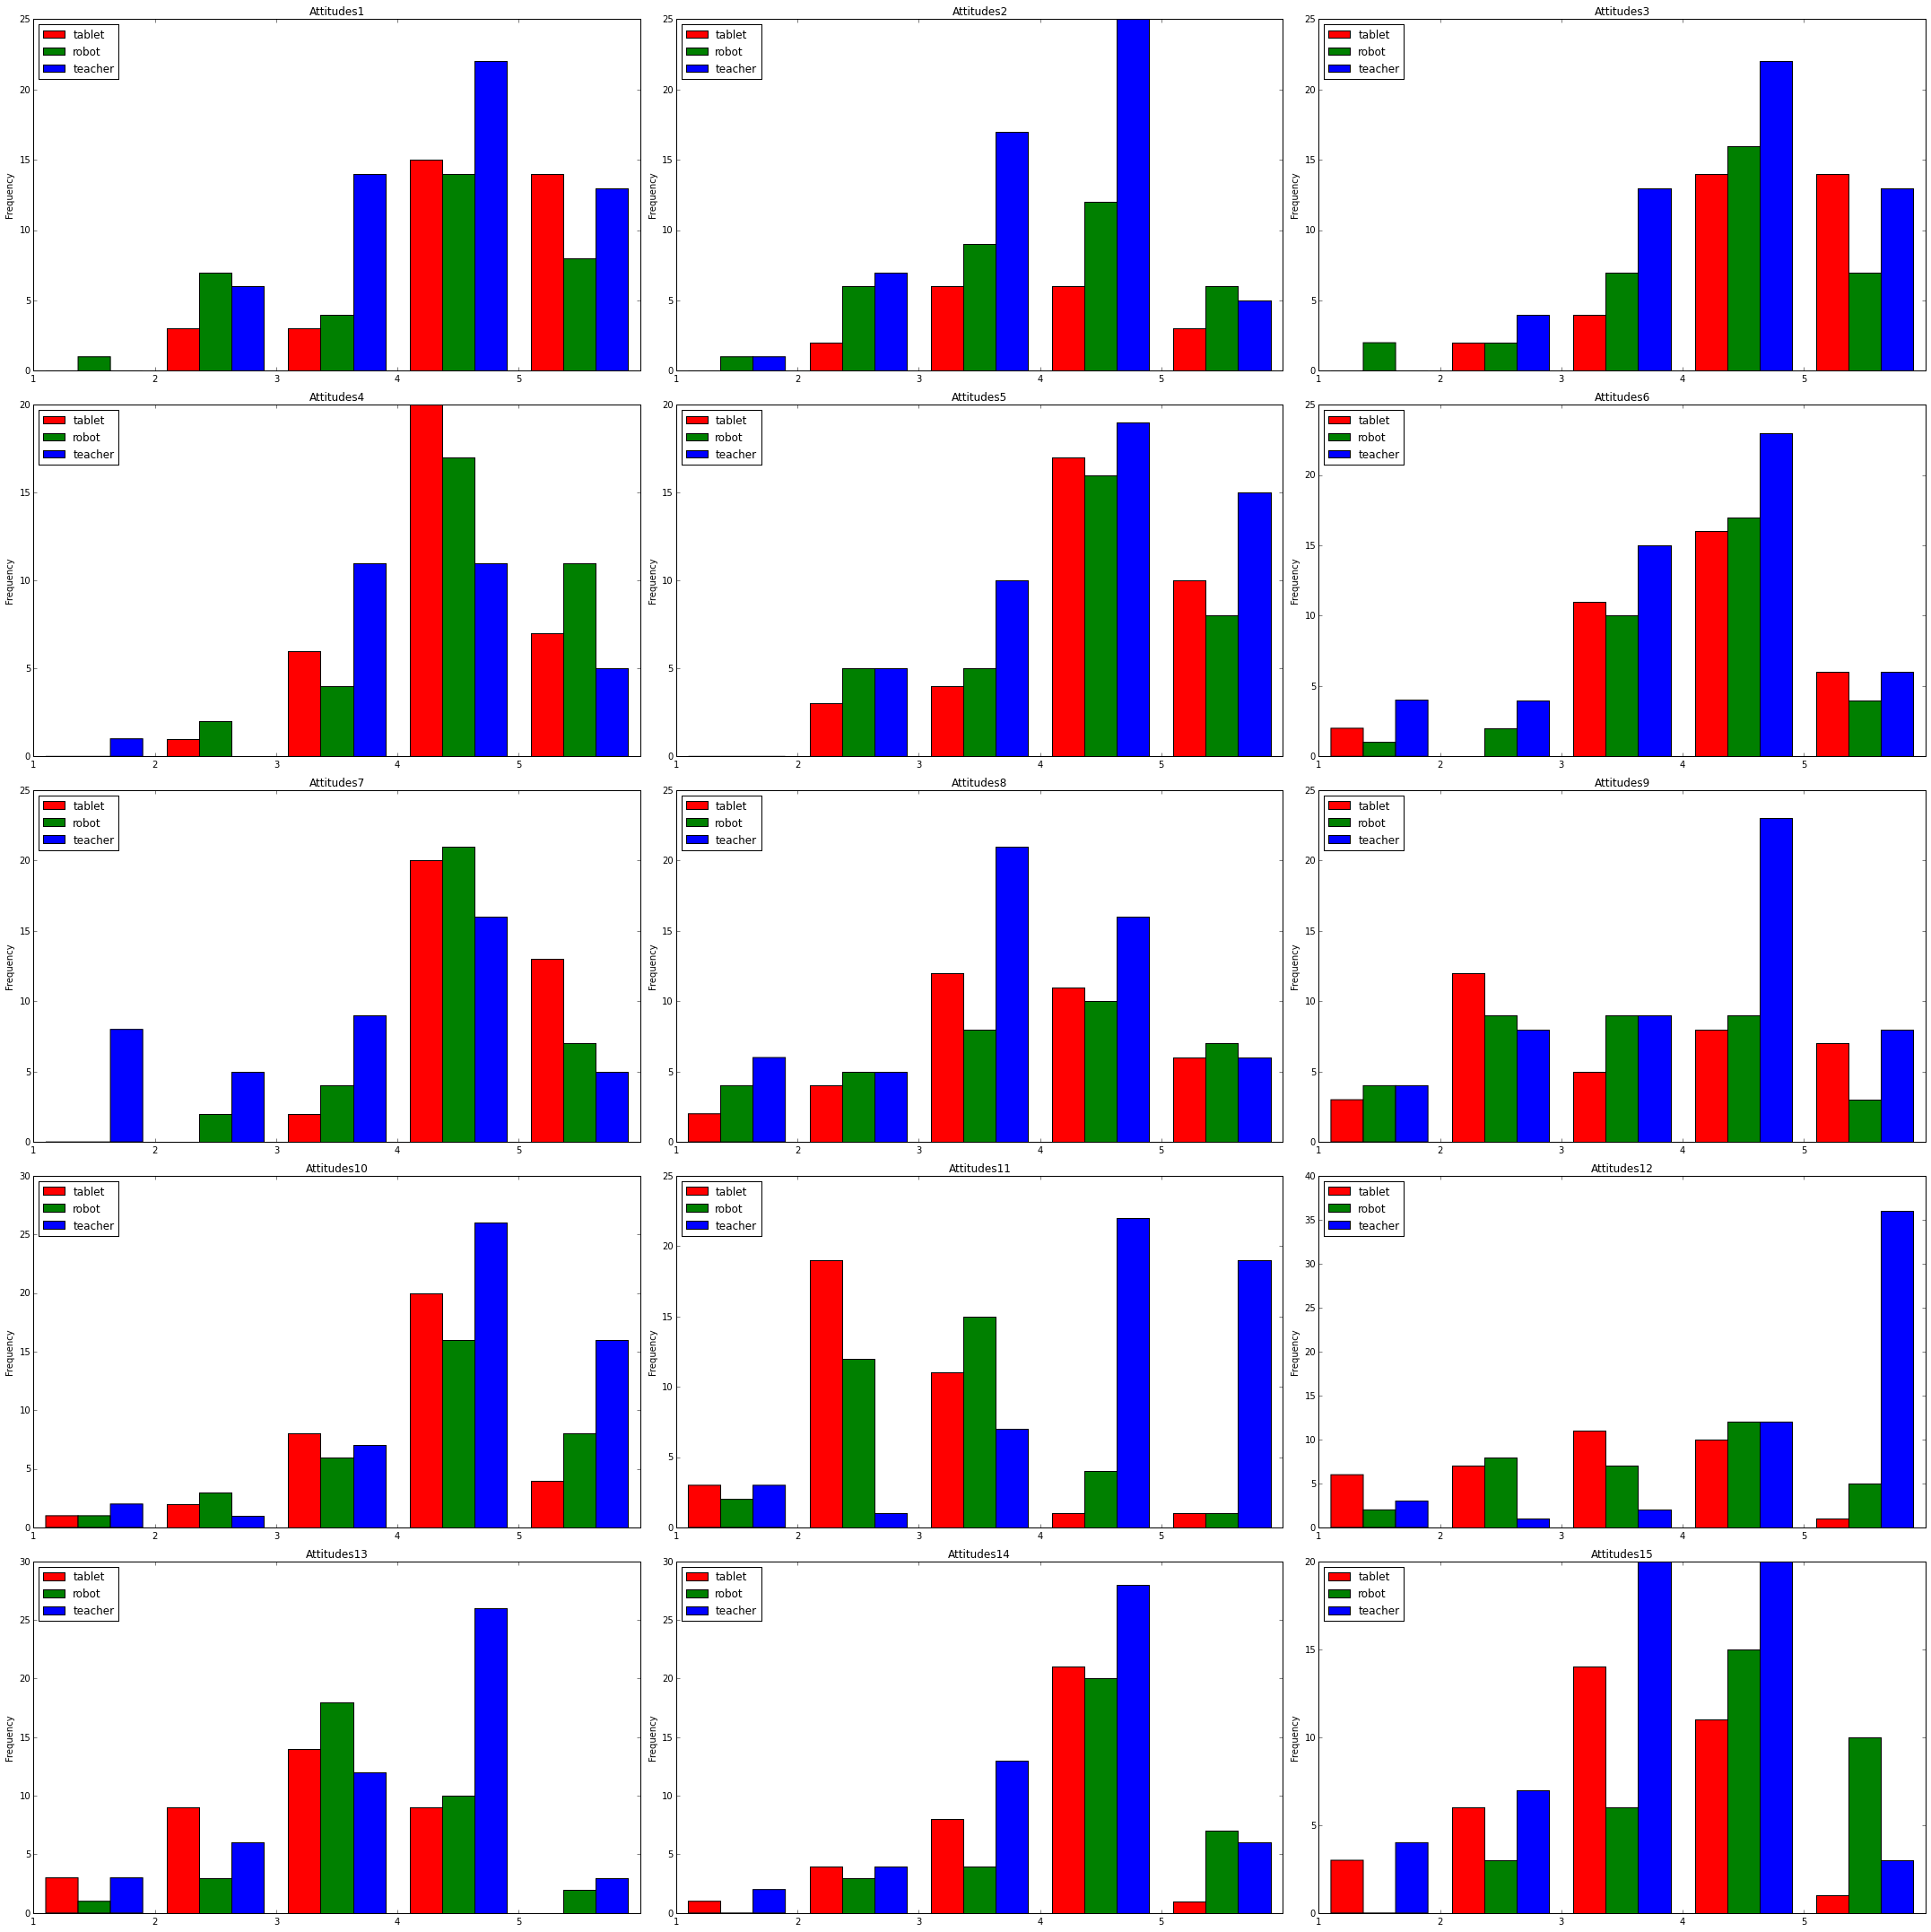

In [418]:
i=1
#for column in df_Attitudes_teacher:
fig = plt.figure(figsize=(30, 30))
grid = plt.GridSpec(3, 5, hspace=10, wspace=10)
for i in range(0,15):
    plt.subplot(5,3,i+1)
    ta = df_Attitudes_tablet["A_ta_"+str(i+1)].dropna()
    ro = df_Attitudes_robot["A_ro_"+str(i+1)].dropna()
    te = df_Attitudes_teacher['A_te_'+str(i+1)].dropna()
    x=[ta,ro,te]
    plot_multi_histogram(x=x,xlabel="Attitudes"+str(i+1))
    
plt.tight_layout() #this will space the graphs nicely from each other
plt.show

<type 'list'>


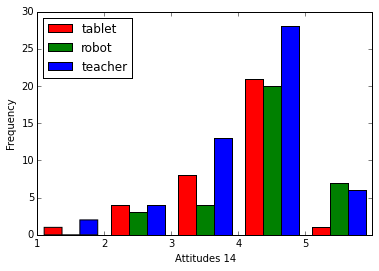

In [392]:

i=13
ta = df_Attitudes_tablet["A_ta_"+str(i+1)].dropna()
ro = df_Attitudes_robot["A_ro_"+str(i+1)].dropna()
te = df_Attitudes_teacher["A_te_"+str(i+1)].dropna()
plt.hist([ta, ro, te],bins=[1,2,3,4,5,6], color=['red', 'green','blue'])
legend = ['tablet', 'robot','teacher']
plt.xlabel("Attitudes "+str(i+1))
plt.ylabel("Frequency")
plt.legend(legend,loc=2)
plt.xticks(range(1, 6))
plt.show()

<function matplotlib.pyplot.show>

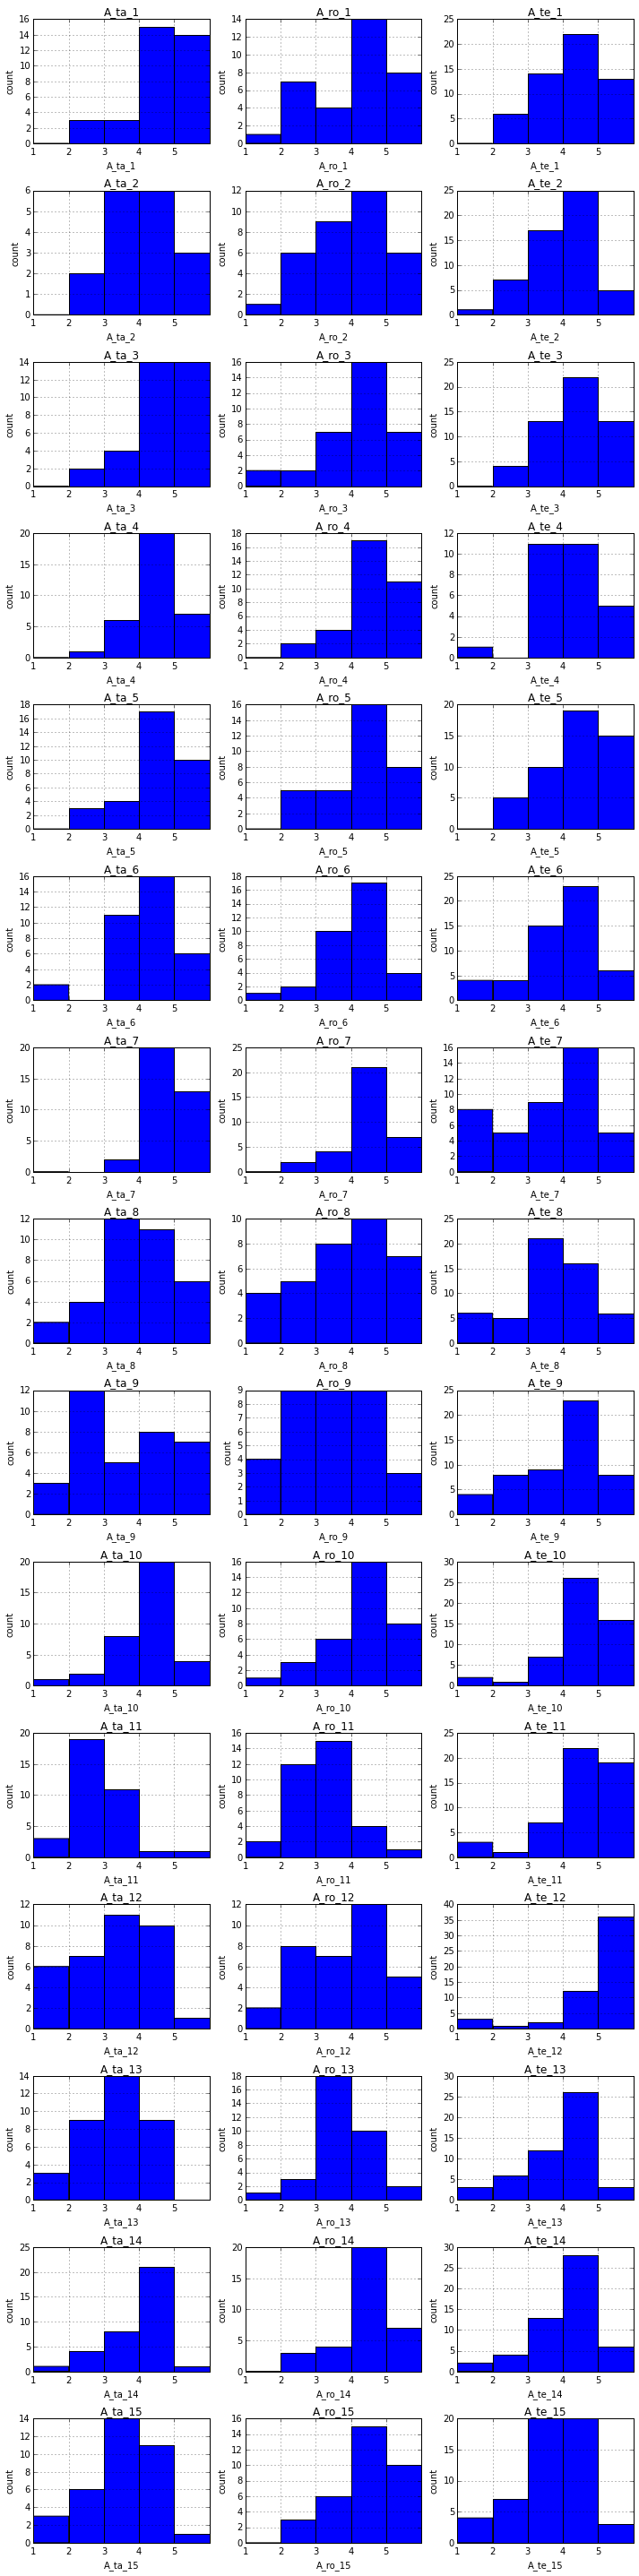

In [378]:
i=1
#for column in df_Attitudes_teacher:
fig = plt.figure(figsize=(10, 40))
grid = plt.GridSpec(14, 14, hspace=50, wspace=10)
for i in range(0,15):
    #print(i)
    plt.subplot(15,3,3*i+1)
    ta = df_Attitudes_tablet["A_ta_"+str(i+1)]
    #print(te)
    plot_histogram(ta)
    
    plt.subplot(15,3,3*i+2)
    ro = df_Attitudes_robot["A_ro_"+str(i+1)]
    plot_histogram(ro)
    
    plt.subplot(15,3,3*i+3)
    te = df_Attitudes_teacher['A_te_'+str(i+1)]
    plot_histogram(te)
    #plt.subplot(3,5,2)
    #x = df_Attitudes_teacher[column]
    #plot_histogram(x)
    i+=1
plt.tight_layout() #this will space the graphs nicely from each other
plt.show

In [186]:
print(type(df_Attitudes_teacher))
print(type(df_Attitudes_teacher['A_te_3']))
x=[5,5,3,3,3,4,2,1,1,1,1]
print(type(x))
x1 = np.asarray(x)
print(type(x1))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<type 'list'>
<type 'numpy.ndarray'>


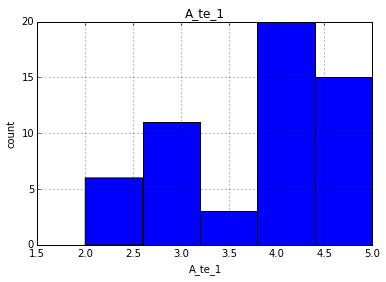

In [366]:
x = df_robotator['A_te_1']
#x=NARS_factors['NARS_sub3']
#x=NARS_factors['NARS_sub3']
x = x [~np.isnan(x)] #remove all NaN
#print(x)
#print("?????",iterable(x[0]))
plot_histogram(x)

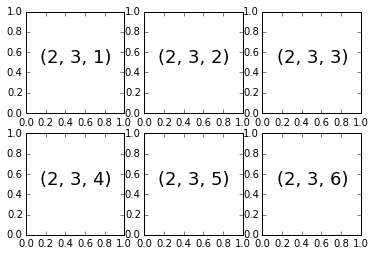

In [205]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

In [475]:
x=df_Attitudes_tablet.describe() 
type(x)
describe_tablet = x.transpose()
mean_tablet = describe_tablet[["mean","std"]]
print(mean_tablet)

x=df_Attitudes_robot.describe() 
type(x)
describe_robot = x.transpose()
mean_robot = describe_robot[["mean","std"]]
print(mean_robot)

x=df_Attitudes_teacher.describe() 
type(x)
describe_teacher = x.transpose()
mean_robot = describe_teacher[["mean","std"]]
print(mean_robot)

             mean       std
A_ta_1   4.142857  0.912103
A_ta_2   3.588235  0.939336
A_ta_3   4.176471  0.869364
A_ta_4   3.970588  0.717119
A_ta_5   4.000000  0.887625
A_ta_6   3.685714  0.963188
A_ta_7   4.314286  0.582663
A_ta_8   3.428571  1.092372
A_ta_9   3.114286  1.323352
A_ta_10  3.685714  0.866753
A_ta_11  2.371429  0.807528
A_ta_12  2.800000  1.132410
A_ta_13  2.828571  0.923093
A_ta_14  3.485714  0.853072
A_ta_15  3.028571  0.984758
             mean       std
A_ro_1   3.617647  1.155086
A_ro_2   3.470588  1.079711
A_ro_3   3.705882  1.059714
A_ro_4   4.088235  0.830029
A_ro_5   3.794118  0.977920
A_ro_6   3.617647  0.888127
A_ro_7   3.970588  0.758199
A_ro_8   3.323529  1.296162
A_ro_9   2.941176  1.179141
A_ro_10  3.794118  1.008431
A_ro_11  2.705882  0.871412
A_ro_12  3.294118  1.168511
A_ro_13  3.264706  0.827879
A_ro_14  3.911765  0.830029
A_ro_15  3.941176  0.919195
             mean       std
A_te_1   3.814727  0.945163
A_te_2   3.544909  0.910460
A_te_3   3.890769  0

In [425]:
df_Attitudes_robot.describe()  

,A_ro_1,A_ro_2,A_ro_3,A_ro_4,A_ro_5,A_ro_6,A_ro_7,A_ro_8,A_ro_9,A_ro_10,A_ro_11,A_ro_12,A_ro_13,A_ro_14,A_ro_15
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,3.617647,3.470588,3.705882,4.088235,3.794118,3.617647,3.970588,3.323529,2.941176,3.794118,2.705882,3.294118,3.264706,3.911765,3.941176
std,1.155086,1.079711,1.059714,0.830029,0.977920,0.888127,0.758199,1.296162,1.179141,1.008431,0.871412,1.168511,0.827879,0.830029,0.919195
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,2.250000,2.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.250000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.500000,3.000000,4.000000,3.000000,3.500000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
